In [1]:
#Install pycaret to teast Clustering
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.5 MB/s eta 0:0

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# check installed version
import pycaret
pycaret.__version__

'3.1.0'

Dataset-https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
Taken Mall customer dataset-some basic data about your customers like Customer ID, age, gender, annual income and spending score.


In [10]:
import numpy as np
import pandas as pd

In [15]:
#loading the mall customers data set
data = pd.read_csv('/content/drive/MyDrive/Pycaret_Assignment/Mall.csv')

In [16]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# we have 4 features and we know there are 4 types of species we want to cluster all the points belonging to a species together

In [17]:
#import ClusteringExperiment and initialize its class
from pycaret.clustering import ClusteringExperiment

In [18]:
exp=ClusteringExperiment()

In [19]:
#initialize a set up
exp.setup(data,session_id=321)

,Description,Value
0,Session id,321
1,Original data shape,"(200, 5)"
2,Transformed data shape,"(200, 5)"
3,Ordinal features,1
4,Numeric features,4
5,Categorical features,1
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [20]:
exp.get_config('_ml_usecase')

<MLUsecase.CLUSTERING: 3>

In [21]:
#lets create a KMeans
kmeans_model = exp.create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4225,260.8338,0.8582,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [22]:
kmeans_model

KMeans(n_clusters=4, random_state=321)

In [23]:
exp.plot_model(kmeans_model,'cluster')

In [24]:
#lets check the other available modesl
exp.models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [25]:
#lets train a dbscan and  birtch model
dbscan_model = exp.create_model('dbscan')
birch_model = exp.create_model('birch')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3907,240.7400,0.8804,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# out of the 3 models birch_model is performing the best

In [26]:
exp.plot_model(birch_model,'cluster')

In [27]:
birch_cluster = exp.assign_model(birch_model) #assigns cluster labels to the training data, given a trained model, you can also use exp.predict_model() for the same task
birch_cluster

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,Cluster 0
1,2,Male,21,15,81,Cluster 0
2,3,Female,20,16,6,Cluster 0
3,4,Female,23,16,77,Cluster 0
4,5,Female,31,17,40,Cluster 0
...,...,...,...,...,...,...
195,196,Female,35,120,79,Cluster 1
196,197,Female,45,126,28,Cluster 3
197,198,Male,32,126,74,Cluster 1
198,199,Male,32,137,18,Cluster 3


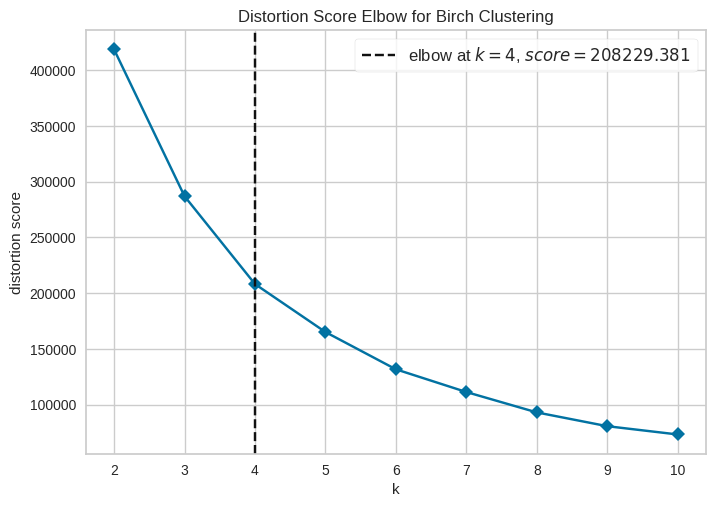

In [28]:
#plot elbow graph
exp.plot_model(birch_model, plot = 'elbow')

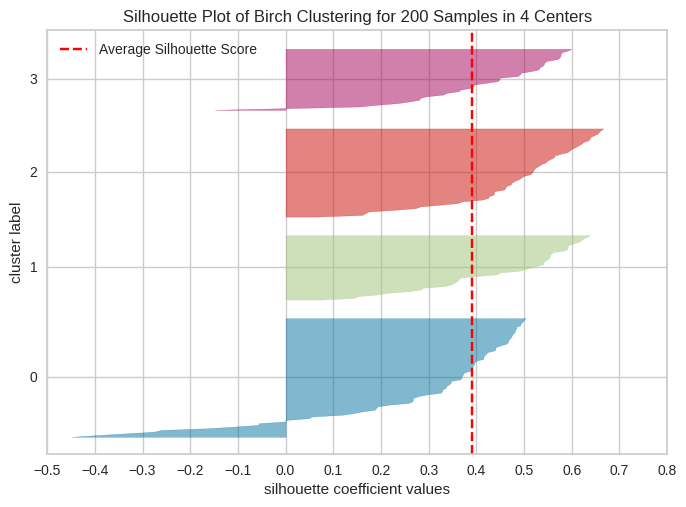

In [29]:
#plot the Silhoutte
exp.plot_model(birch_model, plot = 'silhouette')

In [30]:
exp.evaluate_model(birch_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [31]:
# save the birch pipeline
exp.save_model(birch_model, './kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['CustomerID', 'Age',
                                              'Annual Income (k$)',
                                              'Spending Score (1-100)'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_type': dtype('O

In [32]:
#reading the saved model to make assign clustering on the entire dataset
from pycaret.clustering import load_model,predict_model

In [33]:
model = load_model('./kmeans_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [34]:
model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CustomerID', 'Age',
                                             'Annual Income (k$)',
                                             'Spending Score (1-100)'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Gender'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Gender'],
                                    transformer=OrdinalEncoder(cols=['Gender'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'Gender',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': Female    0
Male      1
NaN      -1
dtype: int64}]))),
                ('trained_model', Birch(n_clusters=4))])

In [35]:
prediction = predict_model(model,data=data)

In [36]:
prediction

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,Cluster 0
1,2,Male,21,15,81,Cluster 0
2,3,Female,20,16,6,Cluster 0
3,4,Female,23,16,77,Cluster 0
4,5,Female,31,17,40,Cluster 0
...,...,...,...,...,...,...
195,196,Female,35,120,79,Cluster 1
196,197,Female,45,126,28,Cluster 3
197,198,Male,32,126,74,Cluster 1
198,199,Male,32,137,18,Cluster 3


Refrences:
[1] https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Clustering.ipynb